In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tools import *
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from testCases_v3 import *

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


np.random.seed(1)

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

x_set_train_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
x_set_test_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

#* normoliaze
train_x =x_set_train_flatten/255.
test_x = x_set_test_flatten/255.

#* the input parameters
iteration_num = 3000
learning_rate = 0.0075
sizes_of_layers = [train_x.shape[0], 20, 7, 5, 1]
activation = "relu"

In [6]:
def L_layer_model_training(X, Y, sizes_of_layers, activation, learning_rate, iteration_num, print_cost):

    #* check whether the size of the first and last layer are set correctly.
    assert sizes_of_layers[0] == X.shape[0], "the size of the first layer does not match the input layer."
    assert sizes_of_layers[-1] == 1, "the output is a value not array!"

    parameters = initialize_parameter(sizes_of_layers)

    cost_list = []

    for i in range(0, iteration_num ):
        caches = forward_porpogate(X, parameters, activation)
        grads = back_propogate(Y, caches, activation)
        parameters = update_parameters(parameters, grads, learning_rate)

        AL, WL, bL, ZL, A = caches[-1]
        cost = cost_fun(AL, Y)

        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            cost_list.append(cost)

    # plot the cost
    plt.plot(np.squeeze(cost_list))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.567047326836611
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600615
Cost after iteration 1100: 0.27269984417893856
Cost after iteration 1200: 0.23741853400268131
Cost after iteration 1300: 0.19960120532208647
Cost after iteration 1400: 0.18926300388463302
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363318
Cost after iteration 1700: 0.1377748781297294
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005215
Cost after iteration 2000: 0.11382060668633713
Cost after iteration 2100: 0.107839285262

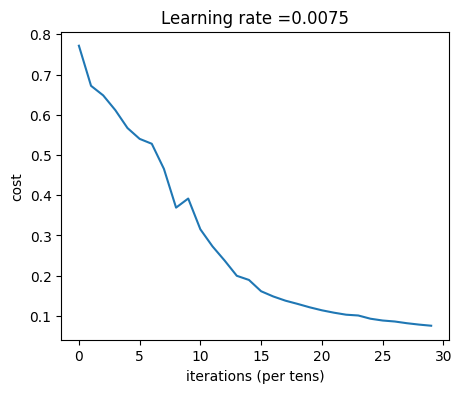

In [10]:
final_parameters = L_layer_model_training(train_x, train_set_y, sizes_of_layers, activation, learning_rate, iteration_num, print_cost = True)

## Some methods to store the variable in python:

- Using pickle:
```python
    import pickle

    with open("nimabi.pkl",'wb') as file:
        pickle.dump(variables, file)

    with open("nimabi.pkl",'rb') as file:
        sb = pickle.load(file)
```

**Notice**:

The file must be saved and loaded in the binary format, that is why we use the `wb` and `rb`.

- Using HDF5:
```python
    import h5py
    import numpy as np

    # 假设我们有一些数据和对应的标签
    data = np.random.randn(1000, 100)  # 随机生成的数据
    labels = np.random.randint(2, size=1000)  # 随机生成的标签

    # 创建一个新的HDF5文件
    with h5py.File('data.h5', 'w') as hdf:
        # 创建一个数据集
        hdf.create_dataset('dataset1', data=data)
        hdf.create_dataset('labels', data=labels

    with h5py.File('data.h5', 'r') as hdf:
        # 读取数据
        data = hdf['dataset1'][:]
        labels = hdf['labels'][:]
    
```

**Notice:**

Use `h5py.File` to open the file instead of the function `open`.

- Using Numpy:
```python
    import numpy as np
    np.save("nimabi.npy", variables)

    sb = np.load("nimabi.npy", allow_pickle = True).item()
```

**Notice:**

Here `np.load.item()` is used to extract the element in ndarray(which only contains one element such as a dict variable), rather than a ndarrary contians a dict. 

Similar to squeeze.

**Tips:**

Iterate over variables in dict(using .item()):

```python
    for key, value in dict_variable.items():
```

**items for dict, and item for np.load**, items in dict returns a tuple with key-value couple.


In [18]:
def store_parameters(parameters, filename):

    with h5py.File(filename, 'w') as hdf:
        for key, value in parameters.items():
            hdf.create_dataset(key, data = value)

def load_parameters(filename):
    parameters = {}

    with h5py.File(filename, 'r') as hdf:
        for key in hdf.keys():
            parameters[key] = hdf[key][:]

    return parameters

In [23]:
def predict_picture(filename, num_px, num_py, activation):
    classes = [b'non-cat' , b'cat']

    img = Image.open(filename)
    img_resized = img.resize((num_px, num_py))
    img_rgb = img_resized.convert('RGB')
    img_rgb = np.array(img_rgb)

    plt.imshow(img_rgb)

    img_input = img_rgb.reshape((num_px * num_py * 3,1))

    parameters = load_parameters("parameters.h5")
    
    caches = forward_porpogate(img_input, parameters, activation)

    AL, WL, bL, ZL, A = caches[-1]

    y_output = AL

    if y_output < 0.5:
        y_final = 0
    else:
        y_final = 1

    print("y = " + str(y_final) + ", you predicted that it is a \"" + classes[y_final].decode("utf-8") +  "\" picture.")


y = 1, you predicted that it is a "cat" picture.


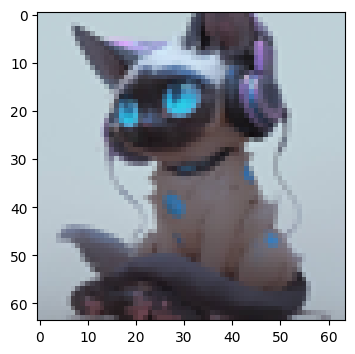

In [32]:
predict_picture("xiao.jpg", 64, 64, "relu")